In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

In [51]:
data = pd.read_csv("all_combined.csv")
# .set_index(["teamName", "year"]).sort_index()

In [52]:
data_0 = data[data['label'] == 0]
data_1 = data[data['label'] == 1]

# print(data_0)
# print(data_1)

training_data_0 = data_0.sample(frac=0.8)
testing_data_0 = data_0.drop(training_data_0.index)

training_data_1 = data_1.sample(frac=0.8)
testing_data_1 = data_1.drop(training_data_1.index)

# print("data class 0")
# print(training_data_0)
# print(testing_data_0)

# print("data class 1")
# print(training_data_1)
# print(testing_data_1)

X = training_data_0.append(training_data_1, ignore_index=True)
# X_train = X.loc[:, X.columns != 'label']
X_train = X.loc[:, ~X.columns.isin(['teamName', 'year', 'label', 'seed_points', 'NIT', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
X_label = X['label']

print("training")
print(X)

Y = testing_data_0.append(testing_data_1, ignore_index=True)
Y_test = Y.loc[:, Y.columns != 'label']
Y_test = Y.loc[:, ~Y.columns.isin(['teamName', 'year', 'label', 'seed_points', 'NIT', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
Y_label = Y['label']

print("testing")
print(Y)

print(X_train.shape)
print(Y_test.shape)

training
                    teamName  year  prev_3s_recruits  prev_4s_recruits  \
0           Eastern Illinois  2017                 1                 0   
1               Savannah St.  2015                 0                 0   
2              San Francisco  2021                 0                 0   
3               UC Riverside  2017                 0                 0   
4              Massachusetts  2021                 2                 1   
...                      ...   ...               ...               ...   
2509               Wisconsin  2015                 3                 1   
2510  North Carolina Central  2019                 0                 0   
2511                 Arizona  2021                 1                 1   
2512                Oklahoma  2017                 2                 1   
2513              Seton Hall  2018                 1                 1   

      prev_5s_recruits  curr_3s_recruits  curr_4s_recruits  curr_5s_recruits  \
0                    0

In [53]:
print(X[X['label'] == 0].loc[:, 'teamName'])

0       Eastern Illinois
1           Savannah St.
2          San Francisco
3           UC Riverside
4          Massachusetts
              ...       
2020     Sam Houston St.
2021         Utah Valley
2022    Prairie View A&M
2023               Rider
2024         Stony Brook
Name: teamName, Length: 2025, dtype: object


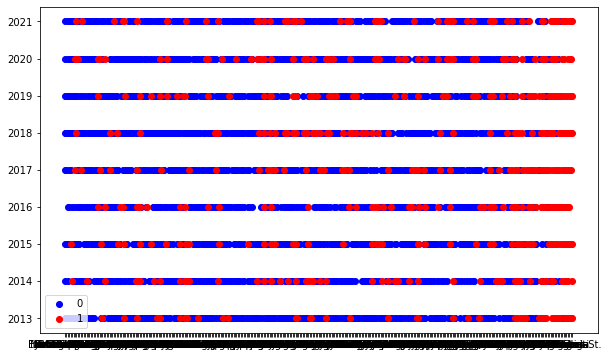

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(X[X['label'] == 0].loc[:, 'teamName'], X[X['label'] == 0].loc[:, 'year'], color='b', label='0')
plt.scatter(X[X['label'] == 1].loc[:, 'teamName'], X[X['label'] == 1].loc[:, 'year'], color='r', label='1')
plt.legend();

In [55]:
class LogisticRegression:
    
    # set parameters - learning rate, number ot iterations, bias, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __bias(self, X):
        # set bias as 1
        bias = np.ones((X.shape[0], 1))
        # concat bias to data
        return np.concatenate((bias, X), axis=1)
    
    def __sigmoid_function(self, x):
        # sigmoid function to predicts yp
        return 1 / (1 + np.exp(-x))
    
    def __loss(self, yp, y):
        # minimize loss
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # training function
    def fit(self, X, y):
        
        # use bias if specified
        if self.fit_intercept:
            X = self.__bias(X)
        
        # initialize weights as 0 initially
        self.W = np.zeros(X.shape[1])
        
        # run for number of iterations provided
        for i in range(self.num_iterations):
            
            z = np.dot(X, self.W)
            
            # prediction probabilities
            yp = self.__sigmoid_function(z)
            
            # calculate gradient
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # update W
            self.W -= self.learning_rate * gradient
            
            # new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # calculate loss
            loss = self.__loss(yp, y)
            
            # to print loss with verbose
            if(self.verbose ==True and i % 1000 == 0):
                print(f'loss: {loss} \t')
    
    # predict the probabilities using W
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__bias(X)
        
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # predict class from probabilities; less than 0.5 = 0 or more than 0.5 = 1
    def predict(self, X):
        return self.predict_prob(X).round()

In [59]:
model = LogisticRegression(learning_rate=0.01, num_iterations=50000, verbose=True)

In [60]:
%%time
model.fit(X_train, X_label)

loss: 0.6907556937961412 	
loss: 0.3130628840178381 	
loss: 0.28164068048460406 	
loss: 0.26960728543538126 	
loss: 0.2632744718359632 	
loss: 0.25945152314629144 	
loss: 0.2569418634707733 	
loss: 0.25518878077390156 	
loss: 0.2538999697654668 	
loss: 0.25290943261291393 	
loss: 0.25211746572381977 	
loss: 0.25146157702841554 	
loss: 0.2509012566458342 	
loss: 0.25040951822523294 	
loss: 0.24996797517098387 	
loss: 0.24956386180827356 	
loss: 0.24918817197169202 	
loss: 0.24883446346029656 	
loss: 0.24849807190332965 	
loss: 0.24817558327705908 	
loss: 0.24786447373859372 	
loss: 0.24756285995708904 	
loss: 0.24726932375475982 	
loss: 0.24698278752462077 	
loss: 0.24670242483449348 	
loss: 0.24642759571651823 	
loss: 0.24615779946450678 	
loss: 0.24589263996807328 	
loss: 0.24563180010018285 	
loss: 0.24537502269166114 	
loss: 0.2451220963299613 	
loss: 0.244872844711992 	
loss: 0.2446271186289525 	
loss: 0.24438478990945584 	
loss: 0.24414574682579057 	
loss: 0.24390989059752077 	
lo

In [61]:
preds = model.predict(Y_test)
(preds == Y_label).mean()

0.8853503184713376

In [62]:
print(model.W)
print(model.W.shape)

[-2.66287618 -0.14371892 -0.06420122  0.28740568 -0.28429533 -0.0558308
 -0.26926975 -1.23572468 -0.67861972  0.07037805  1.9887149   2.81897647
 -0.09300024]
(13,)


In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 3000).fit(X_train, X_label)
clf.predict(Y_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
clf.score(Y_test, Y_label)

0.8964968152866242